In [86]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px
import gc

from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall


from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [87]:
path = '/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images'

In [88]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')


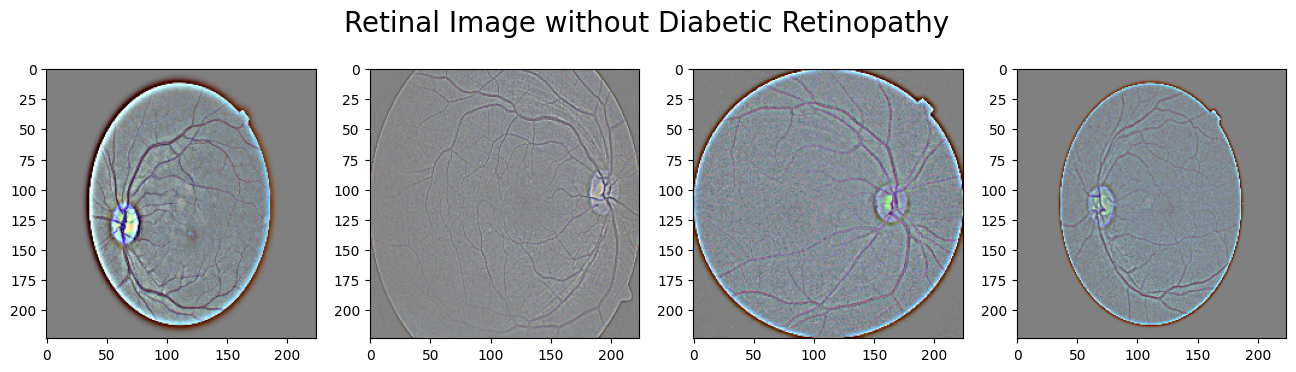

In [89]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()


In [90]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

In [91]:
gc.collect()

5110

In [92]:
#Normalizing pixel values
X = []
y = []
desired_size = (128, 128) 

for i in Classes:
    folder_path ='/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/' +i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path+'/'+j)
        img = cv2.resize(img, desired_size)
        # normalize values
        img = img / 255  #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img)
        y.append(Classes[i])

In [93]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 128, 128, 3), (3662,))

In [94]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [95]:
from imblearn.over_sampling import SMOTE
# Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel())

In [96]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [97]:
X[0].shape

(49152,)

In [98]:
X = X.reshape(X.shape[0], 128, 128, 3)

In [99]:
X[0].shape

(128, 128, 3)

In [100]:
gc.collect()

14294

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)

In [102]:
X_train.shape

(7220, 128, 128, 3)

In [103]:
X_test.shape

(1805, 128, 128, 3)

In [104]:
# Reshape the arrays
X_train = X_train.reshape((-1, 128, 128, 3))
X_test = X_test.reshape((-1, 128, 128, 3))

In [105]:
from tensorflow.keras.applications.densenet import DenseNet121

In [ ]:
a

In [67]:
model.trainable = True

set_trainable = False

for layer in model.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [68]:
for layer in model.layers[:]:
    if ('bn' in layer.name):
        trainable = False

In [69]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [70]:
x = Flatten()(model.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)

In [71]:
from tensorflow.keras.models import Model
model = Model(inputs=model.input, outputs=prediction)

In [72]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 134, 134, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 64, 64, 64)     │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 64, 64, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 64, 64, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 66, 66, 64)     │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 32, 32, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 32, 32, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 32, 32, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 32, 32, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 32, 32, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 32, 32, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 32, 32, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 32, 32, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 9,135,429 (34.85 MB)

 Trainable params: 2,266,053 (8.64 MB)

 Non-trainable params: 6,869,376 (26.20 MB)

In [73]:
gc.collect()

1978

In [122]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Early Stopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=10, verbose=1, mode='auto')

# Model Checkpoint
mc = ModelCheckpoint(filepath='densenet121_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

cd = [es, mc]


In [123]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [76]:
gc.collect()

0

In [ ]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs= 70,
          callbacks=cd,
          batch_size=64,
          shuffle=True)


print(model.history.history.keys())

Epoch 1/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3114 - loss: 1.9908
Epoch 1: val_accuracy improved from -inf to 0.49640, saving model to densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - accuracy: 0.3120 - loss: 1.9878 - val_accuracy: 0.4964 - val_loss: 1.2274
Epoch 2/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5162 - loss: 1.1915
Epoch 2: val_accuracy improved from 0.49640 to 0.58227, saving model to densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5163 - loss: 1.1913 - val_accuracy: 0.5823 - val_loss: 1.0346
Epoch 3/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5607 - loss: 1.0954
Epoch 3: val_accuracy improved from 0.58227 to 0.63657, saving model to densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.5608 - loss: 1.0951 - val_accuracy: 0.6366 - val_loss: 0.9487
Epoch 4/70
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6029 - loss: 0.9815
Epoch 4: val_accuracy

In [79]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)
print(model.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [80]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
print("Training Accuracy:", round(train_acc[-1], 2))
print("Training Loss:", round(train_loss[-1], 2))
print("Validation Accuracy:", round(val_acc[-1], 2))
print("Validation Loss:", round(val_loss[-1], 2))

Training Accuracy: 0.98
Training Loss: 0.09
Validation Accuracy: 0.92
Validation Loss: 0.24


In [81]:
gc.collect()

43749

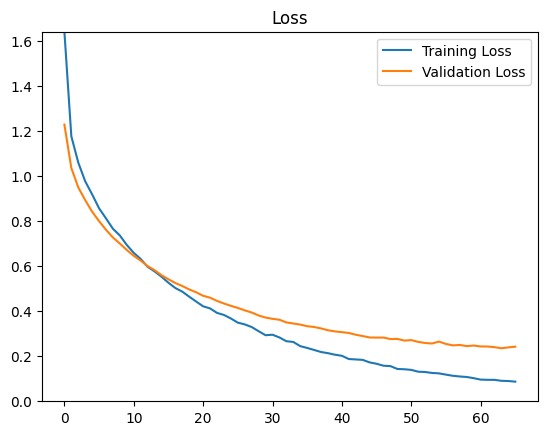

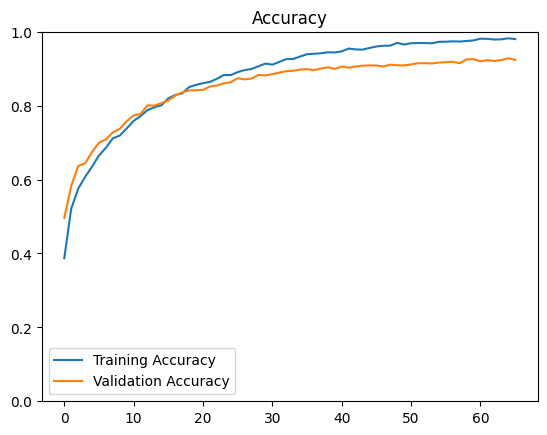

In [82]:
def plot_metrics(history):
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.ylim(0, max(max(train_loss), max(val_loss)))  # Set y-axis limits for loss graph
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis limits for accuracy graph to start from zero
    plt.show()
plot_metrics(history)

In [106]:
import os
print(os.listdir())


['.virtual_documents', 'densenet121_model.keras']


In [107]:
model = load_model('densenet121_model.keras')

In [108]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

226/226 ━━━━━━━━━━━━━━━━━━━━ 137s 586ms/step - accuracy: 0.9950 - loss: 0.0378
%
Accuracy: 99.5014 %


In [109]:
y_predicted_tf = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 38s 622ms/step


In [110]:
y_predicted_tf

array([[9.9911451e-01, 1.1354277e-04, 1.1018469e-04, 2.1086058e-04,
        4.5097244e-04],
       [7.1200411e-05, 9.9590814e-01, 2.3087333e-03, 5.6057241e-05,
        1.6557694e-03],
       [3.1777748e-04, 7.5195014e-04, 5.2242668e-04, 3.7181033e-03,
        9.9468976e-01],
       ...,
       [1.2332827e-02, 8.1062049e-01, 1.4719267e-01, 1.2520925e-02,
        1.7333020e-02],
       [9.9764305e-01, 1.2648565e-03, 6.0989143e-04, 4.1702148e-04,
        6.5318229e-05],
       [6.2135513e-08, 2.1478743e-06, 9.9958259e-01, 2.8628412e-07,
        4.1494847e-04]], dtype=float32)

In [111]:
y_test

array([0, 1, 4, ..., 1, 0, 2])

In [112]:
y_predicted_tf[0]

array([9.9911451e-01, 1.1354277e-04, 1.1018469e-04, 2.1086058e-04,
       4.5097244e-04], dtype=float32)

In [113]:
y_predicted = np.argmax(y_predicted_tf,axis=1)
y_predicted 

array([0, 1, 4, ..., 1, 0, 2])

In [114]:
len(y_test)

1805

In [115]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

,Y_test,Y_predicted
0,0,0
1,1,1
2,4,4
3,4,4
4,0,0
5,1,1
6,1,2
7,3,3


In [116]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
f1_score(y_test, y_predicted, average='micro')

0.9279778393351801

In [117]:
recall_score(y_test, y_predicted, average='micro')

0.9279778393351801

In [118]:
 precision_score(y_test, y_predicted, average='micro')

0.9279778393351801

In [119]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[355   3   1   1   1]
 [  4 336  11   2   8]
 [  4  21 294  18  24]
 [  0   1   3 354   3]
 [  0   6   7  12 336]]


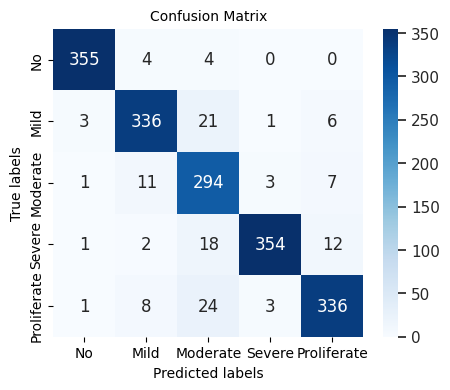

In [120]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);

In [121]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load the image
img_path = '/kaggle/input/diabetic-retinopathy-224x224-gaussian-filtered/gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png'  # Provide the path to your image
img = image.load_img(img_path, target_size=(128, 128)) 

# Preprocess the image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize pixel values to [0, 1]

# Predict class
predicted_classes = model.predict(img_array)
predicted_class_index = np.argmax(predicted_classes)

# Map predicted class index to class label
class_labels = ['No', 'Mild', 'Moderate', 'Severe', 'Proliferate']  # Assuming these are your class labels
predicted_class_label = class_labels[predicted_class_index]

print("Predicted class label:", predicted_class_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted class label: Moderate


In [124]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          epochs= 7,
          callbacks=cd,
          batch_size=64,
          shuffle=True)


print(model.history.history.keys())

Epoch 1/7
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9777 - loss: 0.0886
Epoch 1: val_accuracy improved from -inf to 0.92299, saving model to densenet121_model.keras
113/113 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.9777 - loss: 0.0886 - val_accuracy: 0.9230 - val_loss: 0.2365
Epoch 2/7
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9822 - loss: 0.0823
Epoch 2: val_accuracy did not improve from 0.92299
113/113 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9823 - loss: 0.0823 - val_accuracy: 0.9208 - val_loss: 0.2440
Epoch 3/7
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9853 - loss: 0.0792
Epoch 3: val_accuracy did not improve from 0.92299
113/113 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.9853 - loss: 0.0792 - val_accuracy: 0.9230 - val_loss: 0.2371
Epoch 4/7
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9851 - loss: 0.0729
Epoch 4: val_accuracy improved from 0.92299 to 0.92632, saving model to densenet121_model.keras
113/113 ━━━━━━━━━━━

In [125]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)
print(model.history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [126]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
train_acc = model.history.history['accuracy']
val_acc = model.history.history['val_accuracy']
print("Training Accuracy:", round(train_acc[-1], 2))
print("Training Loss:", round(train_loss[-1], 2))
print("Validation Accuracy:", round(val_acc[-1], 2))
print("Validation Loss:", round(val_loss[-1], 2))

Training Accuracy: 0.98
Training Loss: 0.07
Validation Accuracy: 0.92
Validation Loss: 0.23


In [127]:
gc.collect()

52520

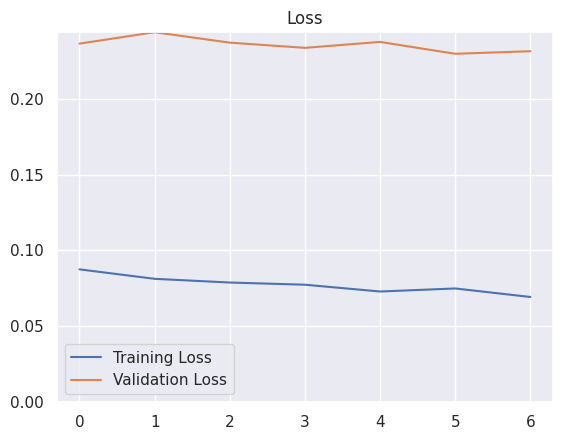

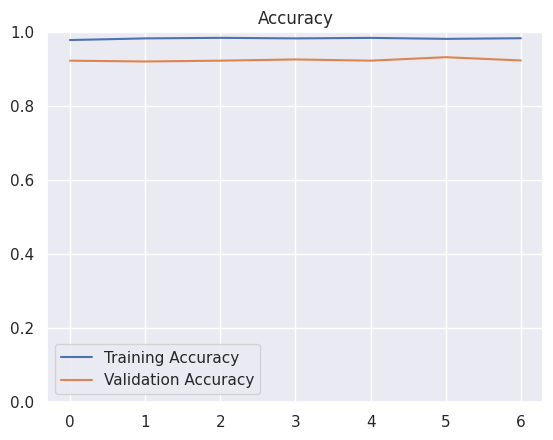

In [128]:
def plot_metrics(history):
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.ylim(0, max(max(train_loss), max(val_loss)))  # Set y-axis limits for loss graph
    plt.show()

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.ylim(0, 1)  # Set y-axis limits for accuracy graph to start from zero
    plt.show()
plot_metrics(history)

In [129]:
import os
print(os.listdir())


['.virtual_documents', 'densenet121_model.keras']


In [130]:
model = load_model('densenet121_model.keras')

In [131]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

226/226 ━━━━━━━━━━━━━━━━━━━━ 135s 566ms/step - accuracy: 0.9951 - loss: 0.0306
%
Accuracy: 99.5429 %


In [132]:
y_predicted_tf = model.predict(X_test)

57/57 ━━━━━━━━━━━━━━━━━━━━ 37s 606ms/step


In [133]:
y_predicted_tf

array([[9.99373078e-01, 6.26616020e-05, 7.59278628e-05, 1.40104516e-04,
        3.48287926e-04],
       [1.25624589e-04, 9.94682670e-01, 2.66502518e-03, 5.30742254e-05,
        2.47359951e-03],
       [1.20222314e-04, 2.55554041e-04, 4.47485509e-04, 8.50942277e-04,
        9.98325706e-01],
       ...,
       [1.40822837e-02, 8.52492332e-01, 1.10688075e-01, 1.41848577e-02,
        8.55256896e-03],
       [9.98824894e-01, 4.57554677e-04, 4.35774331e-04, 2.33861938e-04,
        4.79011978e-05],
       [5.04759043e-08, 8.13941710e-07, 9.99703944e-01, 1.77408523e-07,
        2.95038102e-04]], dtype=float32)

In [134]:
y_test

array([0, 1, 4, ..., 1, 0, 2])

In [135]:
y_test

array([0, 1, 4, ..., 1, 0, 2])

In [136]:
y_predicted_tf[0]

array([9.9937308e-01, 6.2661602e-05, 7.5927863e-05, 1.4010452e-04,
       3.4828793e-04], dtype=float32)

In [137]:
y_predicted = np.argmax(y_predicted_tf,axis=1)
y_predicted 

array([0, 1, 4, ..., 1, 0, 2])

In [138]:
len(y_test)

1805

In [139]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

,Y_test,Y_predicted
0,0,0
1,1,1
2,4,4
3,4,4
4,0,0
5,1,1
6,1,2
7,3,3


In [140]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score
f1_score(y_test, y_predicted, average='micro')

0.932409972299169

In [141]:
recall_score(y_test, y_predicted, average='micro')

0.932409972299169

In [142]:
 precision_score(y_test, y_predicted, average='micro')

0.932409972299169

In [143]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

[[355   3   2   0   1]
 [  4 333  13   2   9]
 [  5  15 302  17  22]
 [  0   1   5 352   3]
 [  0   5   6   9 341]]


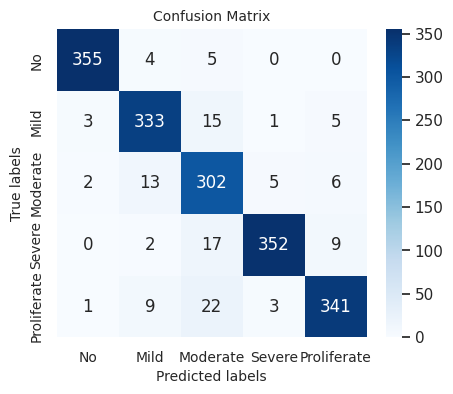

In [144]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);